In [27]:
library(ggplot2)
library(reshape2)
library(stringr)
theme_set(theme_bw())
options(repr.plot.width=8, repr.plot.height=5)

# Introduction

We would like to examine and tabulate frequencies of tertiary interactions across our tRNA set. [Oliva et al. 2006](10.1093/nar/gkj491) has this as Table 1: ![Table 1](../3d.png)

The 18G-55U line is troubling, since it doesn't seem to correspond to the Sprinzl 2004 they used to quantify
frequencies. We'll leave it alone for now, and go through all of the other interactions.

In [1]:
identities = read.delim('identities.tsv', sep='\t')
identities$quality = as.logical(identities$quality)
identities$restrict = as.logical(identities$restrict)

## 8-14-21

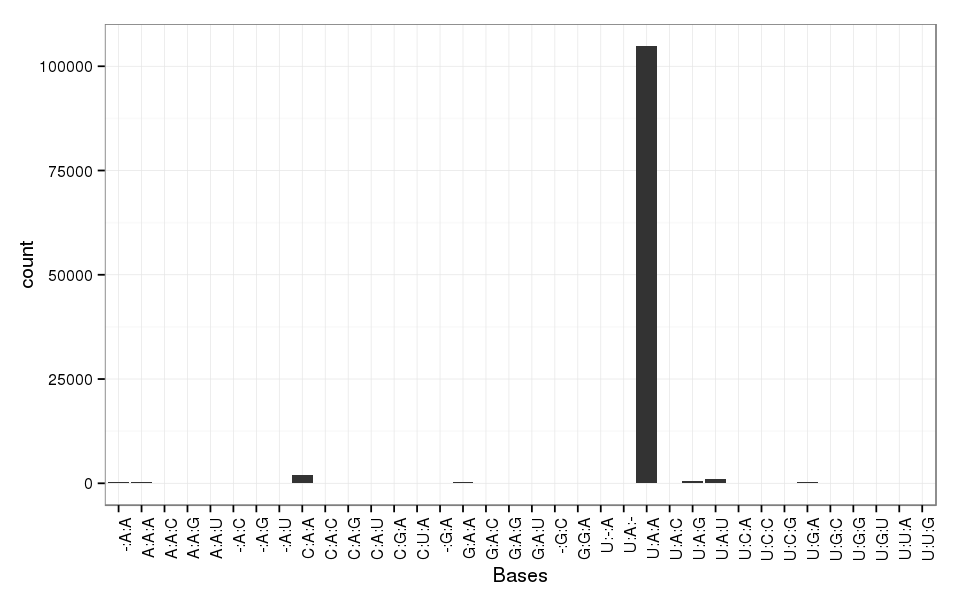

In [80]:
df = identities
df$Bases = paste0(df$X8, ':', df$X14, ':', df$X21)
ggplot(df, aes(x=Bases)) + geom_histogram() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

Do these relative frequencies hold if we restrict by species and quality set?

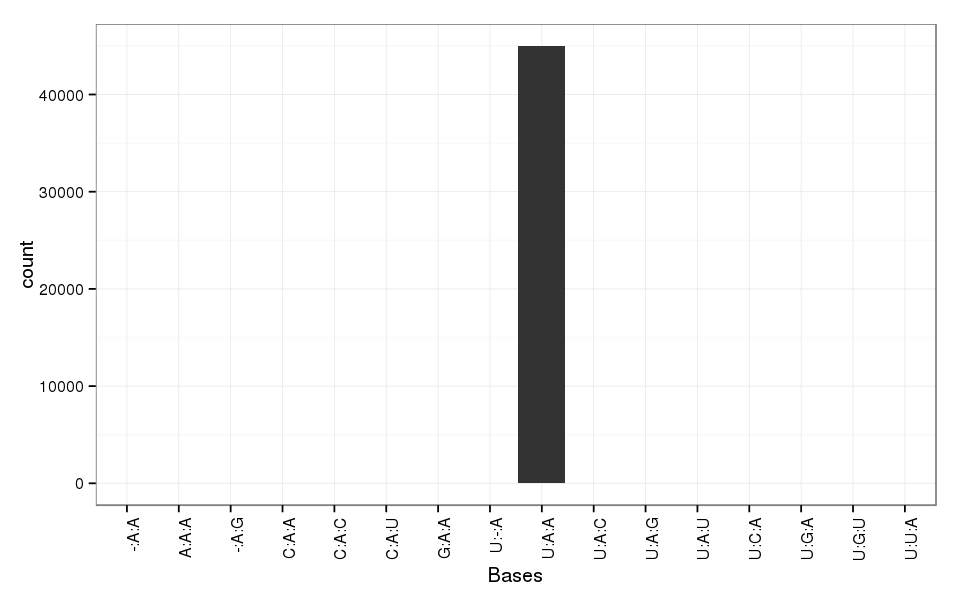

In [103]:
ggplot(df[!df$restrict & df$quality, ], aes(x=Bases)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

The ratio of U:A:A to the other possibilities shrinks a bit, though it's hard to quantify by how much. Which isotypes are responsible for noncanonical base pairs?

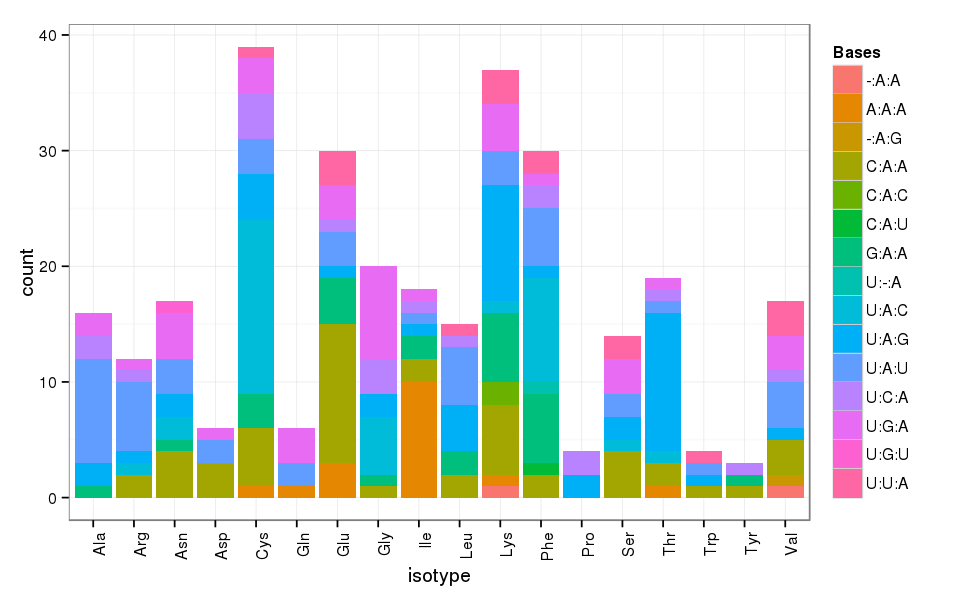

In [104]:
ggplot(df[df$Bases != 'U:A:A' & !df$restrict & df$quality, ], aes(x=isotype, fill=Bases)) + geom_bar() + theme(axis.text.x = element_text(angle = 90, hjust = 1))